In [ ]:
import pygame
from random import choice

# Setup
width, height = 1202, 802
fps = 24
pygame.init()
pygame.mixer.init()
sc = pygame.display.set_mode((width, height))
pygame.display.set_caption("Maze Generator by Nacer KROUDIR")
clock = pygame.time.Clock()

# Initialization
x, y = 0, 0  # Starting position
size = 50  # cell size
half_size = size // 2
cols, rows = width // size, height // size
line_width = 3
line_width_2 = 10
visited_color = pygame.Color('black')
wall_color = pygame.Color('darkorange')
current_cell_color = pygame.Color('saddlebrown')
solution_color = pygame.Color('darkslategray')
flag = True
find_solution = False
paused = True


class Cell:
    def __init__(self, x, y):
        self.x, self.y = x, y
        self.walls = {'top': True, 'left': True, 'bottom': True, 'right': True}
        self.path = {'top': False, 'left': False, 'bottom': False, 'right': False}
        self.visited = False
        self.solution = False

    def draw(self):
        x, y = self.x * size, self.y * size
        if self.visited:
            pygame.draw.rect(sc, visited_color, (x, y, size, size))
        #  if self.solution:
        #     pygame.draw.rect(sc, solution_color, (x+size//6, y+size//6, size-size//3, size-size//3), size//10)
        if self.walls['top']:
            pygame.draw.line(sc, wall_color, (x, y), (x + size, y), line_width)
        if self.walls['left']:
            pygame.draw.line(sc, wall_color, (x, y), (x, y + size), line_width)
        if self.walls['bottom']:
            pygame.draw.line(sc, wall_color, (x, y + size), (x + size, y + size), line_width)
        if self.walls['right']:
            pygame.draw.line(sc, wall_color, (x + size, y), (x + size, y + size), line_width)

        if self.path['top']:
            pygame.draw.line(sc, solution_color, (x + half_size, y), (x + half_size, y + half_size), line_width_2)
        if self.path['left']:
            pygame.draw.line(sc, solution_color, (x, y + half_size), (x + half_size, y + half_size), line_width_2)
        if self.path['bottom']:
            pygame.draw.line(sc, solution_color, (x + half_size, y + half_size), (x + half_size, y + size),
                             line_width_2)
        if self.path['right']:
            pygame.draw.line(sc, solution_color, (x + half_size, y + half_size), (x + size, y + half_size),
                             line_width_2)

    def draw_current_cell(self):
        x, y = self.x * size, self.y * size
        pygame.draw.rect(sc, current_cell_color, (x + line_width, y + line_width, size - line_width, size - line_width))

    def check_cell(self, x, y):
        find_index = lambda x, y: x + y * cols
        if x < 0 or x > cols - 1 or y < 0 or y > rows - 1:
            return False
        return grid_cells[find_index(x, y)]

    def check_neighbors(self):
        neighbors = []
        top = self.check_cell(self.x, self.y - 1)
        left = self.check_cell(self.x - 1, self.y)
        bottom = self.check_cell(self.x, self.y + 1)
        right = self.check_cell(self.x + 1, self.y)
        if top and not top.visited:
            neighbors.append(top)
        if left and not left.visited:
            neighbors.append(left)
        if bottom and not bottom.visited:
            neighbors.append(bottom)
        if right and not right.visited:
            neighbors.append(right)
        return choice(neighbors) if neighbors else False


def remove_walls(current, next):
    dx, dy = current.x - next.x, current.y - next.y
    if dx == 1:
        current.walls['left'] = False
        next.walls['right'] = False
    if dx == -1:
        current.walls['right'] = False
        next.walls['left'] = False
    if dy == 1:
        current.walls['top'] = False
        next.walls['bottom'] = False
    if dy == -1:
        current.walls['bottom'] = False
        next.walls['top'] = False


def add_solution_path(previous, current):
    dx, dy = current.x - previous.x, current.y - previous.y
    if dx == 1:
        current.path['left'] = True
        previous.path['right'] = True
    if dx == -1:
        current.path['right'] = True
        previous.path['left'] = True
    if dy == 1:
        current.path['top'] = True
        previous.path['bottom'] = True
    if dy == -1:
        current.path['bottom'] = True
        previous.path['top'] = True


grid_cells = [Cell(col, row) for row in range(rows) for col in range(cols)]
current_cell = grid_cells[0]
stack = []
solution = []

while True:
    sc.fill(pygame.Color("darkslategray"))

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            exit()
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_SPACE:
                find_solution = True
            if event.key == pygame.K_RETURN:
                paused = not paused

    [cell.draw() for cell in grid_cells]
    current_cell.visited = True
    current_cell.draw_current_cell()

    if not paused:

        next_cell = current_cell.check_neighbors()
        if next_cell:
            next_cell.visited = True
            stack.append(current_cell)
            remove_walls(current_cell, next_cell)
            current_cell = next_cell
            if flag:
                solution.append(current_cell)
        elif stack:
            if current_cell.x == cols - 1 and current_cell.y == rows - 1:
                flag = False  # solution is found
            if flag:
                solution.pop()
            current_cell = stack.pop()
        else:
            if find_solution:
                if solution:
                    previous_cell = current_cell
                    current_cell = solution[-1]
                    current_cell.solution = True
                    add_solution_path(previous_cell, current_cell)
                    solution.pop()
                else:
                    previous_cell = current_cell
                    current_cell = grid_cells[0]
                    add_solution_path(previous_cell, current_cell)

    pygame.display.flip()
    clock.tick(fps)

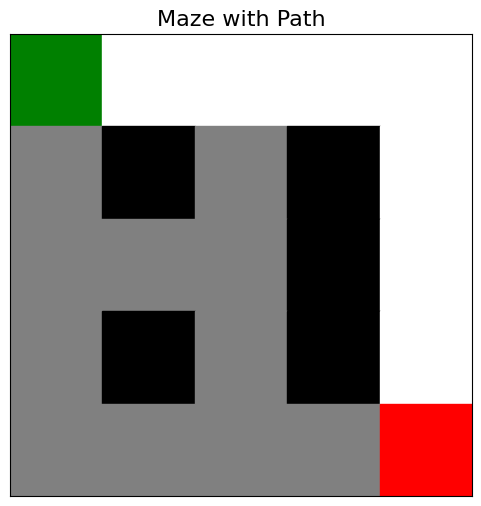

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def display_maze_with_path(rows, cols, walls, path):
    # Initialize maze grid with 0 (unvisited cells)
    maze = np.zeros((rows, cols), dtype=int)

    # Mark walls as 1
    for wall in walls:
        r, c = wall
        maze[r, c] = 1

    # Define colors: 0 -> Grey (unvisited), 1 -> Black (wall)
    # 2 -> White (path), 3 -> Green (start), 4 -> Red (end)
    color_map = {
        0: "grey",  # Unvisited
        1: "black", # Wall
        2: "white", # Path
        3: "green", # Start
        4: "red"    # End
    }

    # Mark the path
    for cell in path:
        r, c = cell
        maze[r, c] = 2

    # Mark start and end
    start = path[0]
    end = path[-1]
    maze[start[0], start[1]] = 3
    maze[end[0], end[1]] = 4

    # Create a color matrix
    color_matrix = [[color_map[cell] for cell in row] for row in maze]

    # Plot the maze
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow([[0] * cols for _ in range(rows)], cmap="Greys", vmin=0, vmax=4)

    # Color each cell
    for i in range(rows):
        for j in range(cols):
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color_matrix[i][j]))

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, cols)
    ax.set_ylim(rows, 0)
    plt.title("Maze with Path", fontsize=16)
    plt.show()


# Example Usage
rows = 5
cols = 5
walls = [(1, 1), (1, 3), (2, 3), (3, 1), (3, 3)]
path = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]

display_maze_with_path(rows, cols, walls, path)
